<a href="https://colab.research.google.com/github/linggaajiandika/EDAPython/blob/main/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**
---



## 1. Import package & Data 

In [ ]:
# Import Package
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from google.colab import files # Optional
import os   # Optional
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)

### 1.1 Run jika punya API Kaggle

In [ ]:
# Import data menggunakan API Kaggle untuk mempermudah

!pip install -U -q kaggle #install kaggle
!mkdir  /root/.kaggle #buat directory
files.upload() # Upload kaggle.json file
!cp kaggle.json /root/.kaggle #copy file to root
!kaggle datasets download -d gpreda/covid-world-vaccination-progress # dataset
!apt install pv
!unzip -o /content/covid-world-vaccination-progress.zip  | pv -l >/dev/null #Unzip
os.remove('covid-world-vaccination-progress.zip')
df=pd.read_csv('/content/country_vaccinations.csv') # dataset covid

mkdir: cannot create directory ‘/root/.kaggle’: File exists


  0% 0.00/1.03M [00:00<?, ?B/s]
100% 1.03M/1.03M [00:00<00:00, 71.4MB/s]
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pv is already the newest version (1.6.6-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
3.00  0:00:00 [51.0 /s] [ <=>                                                  ]


### 1.2 Run jika tidak punya API Kaggle

In [ ]:
# Import data dari directory
df=pd.read_csv('/content/country_vaccinations.csv')

## 2. Exploratory Data Analysis

### 2.1 Informasi Dasar

In [ ]:
# menampilkan bagian data
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
1,Afghanistan,AFG,2021-02-23,nan,nan,nan,nan,1367.00,nan,nan,nan,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
2,Afghanistan,AFG,2021-02-24,nan,nan,nan,nan,1367.00,nan,nan,nan,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
3,Afghanistan,AFG,2021-02-25,nan,nan,nan,nan,1367.00,nan,nan,nan,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...
4,Afghanistan,AFG,2021-02-26,nan,nan,nan,nan,1367.00,nan,nan,nan,34.00,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://app.powerbi.com/view?r=eyJrIjoiYTkyM2V...


In [ ]:
# Informasi dasar dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44672 entries, 0 to 44671
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              44672 non-null  object 
 1   iso_code                             44672 non-null  object 
 2   date                                 44672 non-null  object 
 3   total_vaccinations                   24372 non-null  float64
 4   people_vaccinated                    23268 non-null  float64
 5   people_fully_vaccinated              20345 non-null  float64
 6   daily_vaccinations_raw               19988 non-null  float64
 7   daily_vaccinations                   44369 non-null  float64
 8   total_vaccinations_per_hundred       24372 non-null  float64
 9   people_vaccinated_per_hundred        23268 non-null  float64
 10  people_fully_vaccinated_per_hundred  20345 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df.shape[0]

44672

Berdasarkan informasi tersebut terdapat 15 Kolom, 43890 baris, serta beberapa kolom terdapat missing value. Dalam informasi tersebut juga ditampilkan type data setiap kolomnya

In [ ]:
nulls = df.isnull().sum()
nulls_percentage = nulls[nulls!=0]/df.shape[0]*100
print('Persentase missing value setiap variabel:\n')
print(round(nulls_percentage,2))

Persentase missing value setiap variabel:

total_vaccinations                    45.44
people_vaccinated                     47.91
people_fully_vaccinated               54.46
daily_vaccinations_raw                55.26
daily_vaccinations                     0.68
total_vaccinations_per_hundred        45.44
people_vaccinated_per_hundred         47.91
people_fully_vaccinated_per_hundred   54.46
daily_vaccinations_per_million         0.68
dtype: float64


dapat dilihat bahwa persentase missing value disekitar 50% sehingga data kurang baik untuk digunakan

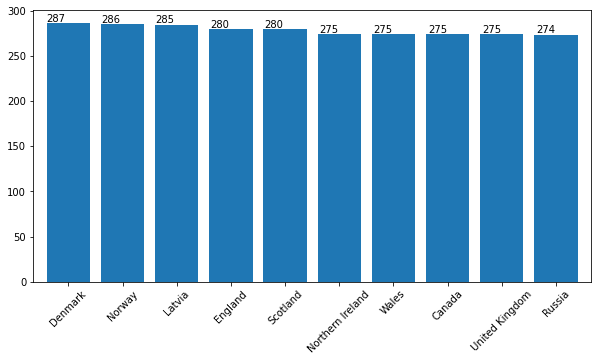

In [ ]:
# Jumlah data berdasarkan negara
ax=df['country'].value_counts().sort_values(ascending=False)[:10].plot(figsize=(10,5),kind='bar', rot=45, width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
#@title Pertanyaan 1: tampilakan 10 data terbawah
jawab_1 =  -10#@param {type:"integer"}

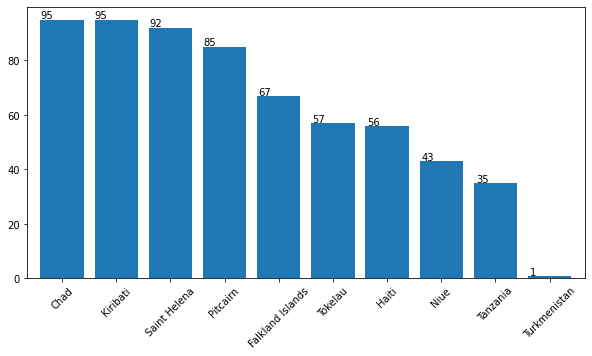

In [ ]:
ax=df['country'].value_counts().sort_values(ascending=False)[jawab_1:].plot(figsize=(10,5),kind='bar', rot=45, width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

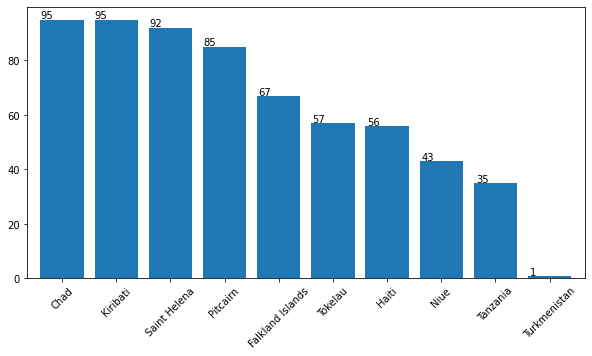

In [ ]:
#Expected Output

### 2.2 Eksplorasi Negara Indonesia

In [ ]:
# slicing data dan dipilih jika kolom 'country' bernilai 'Indonesia'
df_indo = df[df["country"]=="Indonesia"]

In [ ]:
df_indo=df_indo.reset_index(drop=True) # supaya index dimulai dari 0 lagi
df_indo.head() # melihat kembali datanya

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Indonesia,IDN,2021-01-12,0.00,0.00,nan,nan,nan,0.00,0.00,nan,nan,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
1,Indonesia,IDN,2021-01-13,nan,nan,nan,nan,13200.00,nan,nan,nan,48.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
2,Indonesia,IDN,2021-01-14,nan,nan,nan,nan,13200.00,nan,nan,nan,48.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
3,Indonesia,IDN,2021-01-15,nan,nan,nan,nan,13200.00,nan,nan,nan,48.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines
4,Indonesia,IDN,2021-01-16,nan,nan,nan,nan,13200.00,nan,nan,nan,48.00,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://vaksin.kemkes.go.id/#/vaccines


In [ ]:
df_indo.info() #informasi dari dataset vaksin untuk negara Indonesia

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              246 non-null    object 
 1   iso_code                             246 non-null    object 
 2   date                                 246 non-null    object 
 3   total_vaccinations                   201 non-null    float64
 4   people_vaccinated                    201 non-null    float64
 5   people_fully_vaccinated              195 non-null    float64
 6   daily_vaccinations_raw               170 non-null    float64
 7   daily_vaccinations                   245 non-null    float64
 8   total_vaccinations_per_hundred       201 non-null    float64
 9   people_vaccinated_per_hundred        201 non-null    float64
 10  people_fully_vaccinated_per_hundred  195 non-null    float64
 11  daily_vaccinations_per_million  

In [ ]:
nulls = df_indo.isnull().sum()
nulls_percentage = nulls[nulls!=0]/df_indo.shape[0]*100
print('Persentase missing value setiap variabel untuk negara Indonesia:\n')
print(round(nulls_percentage,2))

Persentase missing value setiap variabel untuk negara Indonesia:

total_vaccinations                    18.29
people_vaccinated                     18.29
people_fully_vaccinated               20.73
daily_vaccinations_raw                30.89
daily_vaccinations                     0.41
total_vaccinations_per_hundred        18.29
people_vaccinated_per_hundred         18.29
people_fully_vaccinated_per_hundred   20.73
daily_vaccinations_per_million         0.41
dtype: float64


In [ ]:
# Drop kolom yang tidak dipakai
df_indo=df_indo.drop(['country', 'iso_code','source_name','source_website'], axis=1)

In [ ]:
df_indo_id=df_indo.set_index(['date'])  # mengubah tanggal menjadi index karena datanya timeseries
df_indo_id.index = pd.to_datetime(df_indo_id.index) #mengubah type data pada kolom date menjadi datetime format

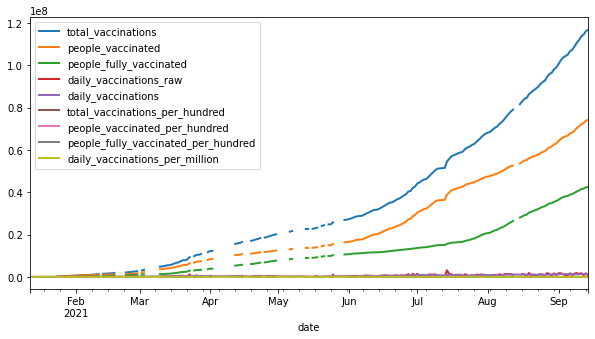

In [ ]:
#plot untuk melihat keseluruhan data
df_indo_id.plot(figsize=(10,5),kind='line', linewidth=2)

### 2.3 Handling Missing Value

#### 2.3.1 Original Data

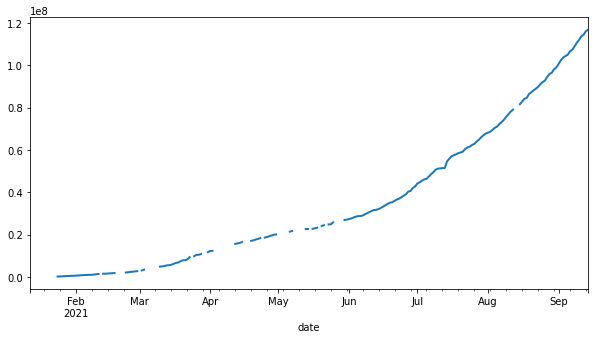

In [ ]:
df_indo_id['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

terlihat bahwa line atau garis tidak terhubung, hal ini dikarenakan aterdapat missing value pada hari tertentu

#### 2.3.2 Drop NaN

In [ ]:
df_drop=df_indo_id.dropna() 
df_drop.shape #ukuran baris akan menyusut karena tanggal yang terdapat data missing di hapus/dibuang

(167, 10)

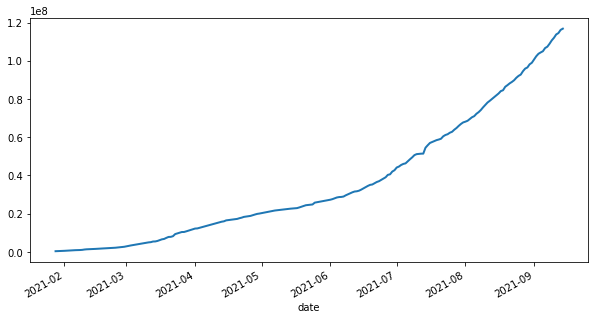

In [ ]:
#Visual dari Drop NaN
df_drop['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

#### 2.3.3 Fill NaN dengan nilai konstan

In [ ]:
df_mean=df_indo_id.fillna(df_indo_id.mean()) # mengisi NaN dengan rarta-rata
df_mean.shape #Juumalah datanya tetap

(246, 10)

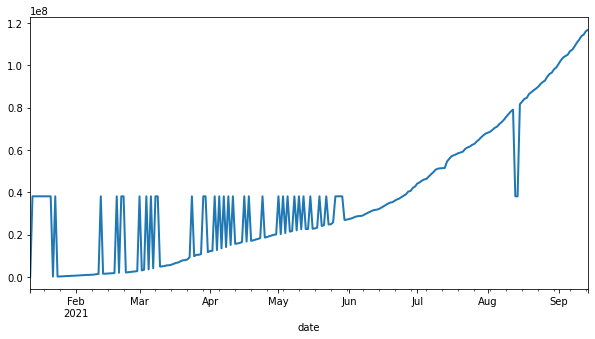

In [ ]:
df_mean['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

output yang dihasilkan kurang baik diakrenakan datanya semakin hari, semakin naik

#### 2.3.4 Menggunakan Interpolasi
Interpolasi adalah metode menghasilkan titik-titik data baru dalam suatu jangkauan dari suatu set diskret

In [ ]:
df_inter=df_indo_id.interpolate(method="polynomial", order=2) # metode polynomial orde ke-2 (x^2)
df_inter.shape #Jumlah datanya tetap

(246, 10)

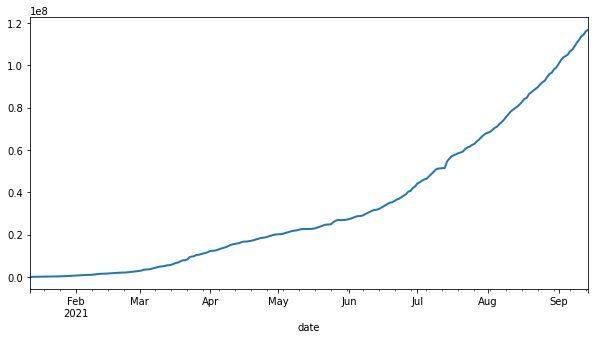

In [ ]:
df_inter['total_vaccinations'].plot(figsize=(10,5),kind='line', linewidth=2)

In [ ]:
#@title Pertanyaan 2: metode impute missing value terbaik untuk dataset ini?
jawab_2 = "Drop NaN" #@param ["Drop NaN", "Fill NaN", "Interpolasi"]


#### 2.3.5 Hasil Interpolasi

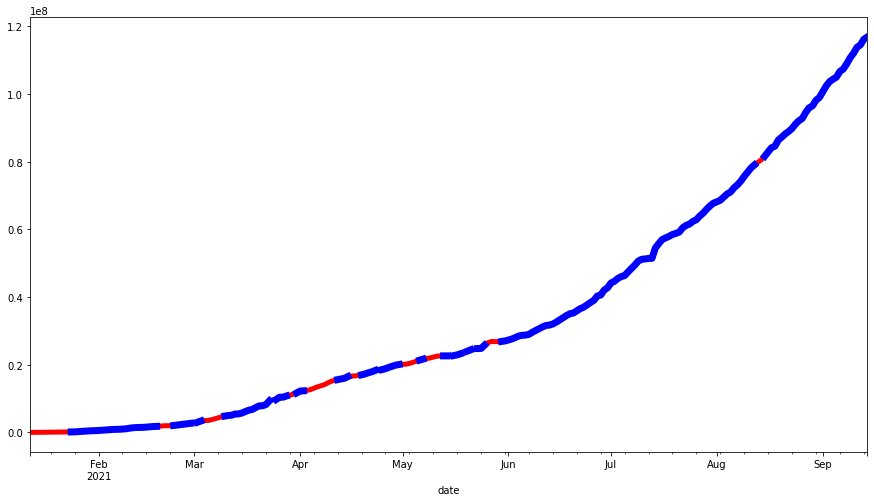

In [ ]:
ax = df_inter['total_vaccinations'].plot(figsize=(15,8),kind='line', linewidth=5,color="red")
df_indo_id['total_vaccinations'].plot(ax=ax,color='blue',linewidth=7)

### 2.4 Statistik Deskriptif

In [ ]:
df_indo.describe() #Data sebelum di impute Missing value

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,198.00,198.00,192.00,167.00,242.00,198.00,198.00,192.00,242.00
mean,36894397.63,24431236.42,12852634.99,592301.50,451453.70,13.35,8.84,4.65,1633.57
std,32574312.11,21441249.25,11240918.50,513105.50,368499.45,11.79,7.76,4.07,1333.38
min,0.00,0.00,5468.00,5162.00,11823.00,0.00,0.00,0.00,43.00
25%,7966568.75,5608512.50,3234722.75,180138.00,193334.25,2.88,2.02,1.17,699.75
50%,27823498.50,16904556.50,11124113.00,469661.00,298972.00,10.07,6.12,4.03,1082.00
75%,60167765.00,43256473.75,17309280.75,888318.00,771295.75,21.77,15.65,6.26,2790.75
max,113783060.00,72248720.00,41534340.00,3087420.00,1371546.00,41.17,26.14,15.03,4963.00


In [ ]:
df_inter.dsecribe() #data setelah di impute Missing Value 

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,243.00,243.00,227.00,230.00,242.00,243.00,243.00,227.00,242.00
mean,32723960.87,21603677.42,11904092.35,511121.54,451453.70,11.84,7.82,4.31,1633.57
std,31543574.10,20793317.47,10841527.41,520993.82,368499.45,11.41,7.52,3.92,1333.38
min,0.00,0.00,5468.00,-717593.39,11823.00,0.00,0.00,0.00,43.00
25%,5460389.00,4002860.00,3127026.45,118951.66,193334.25,1.98,1.44,1.13,699.75
50%,22619205.95,13697256.00,9746522.00,398130.00,298972.00,8.18,4.96,3.53,1082.00
75%,51419113.00,36381605.00,16158427.00,780442.75,771295.75,18.61,13.16,5.85,2790.75
max,113783060.00,72248720.00,41534340.00,3087420.00,1371546.00,41.17,26.14,15.03,4963.00


In [ ]:
#@title Pertanyaan 3: kesimpulan dari data impute missing value dilihat dari summary statitics?
jawab_3 = "" #@param {type:"string"}


### 2.5 Better Understanding

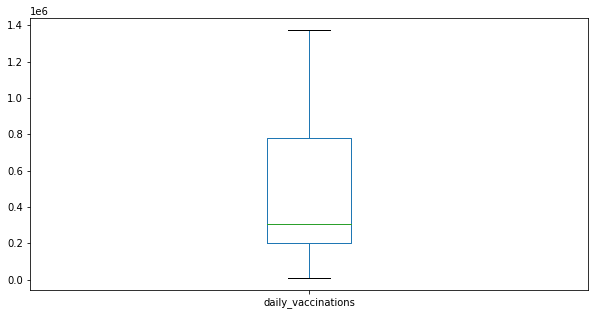

In [ ]:
df_inter['daily_vaccinations'].plot(kind='box', figsize=(10,5))

##### 2.5.1 Handling Outlier
untuk menangani outlier maka dibutuhkan contoh menggunakan data stroke prediction

In [ ]:
df1= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [ ]:
df1_selected = df1[['age','avg_glucose_level','bmi']]
df1_selected=df1_selected.dropna()
df1_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4909 non-null   float64
 1   avg_glucose_level  4909 non-null   float64
 2   bmi                4909 non-null   float64
dtypes: float64(3)
memory usage: 153.4 KB


In [ ]:
df1_selected.describe()

,age,avg_glucose_level,bmi
count,4909.00,4909.00,4909.00
mean,42.87,105.31,28.89
std,22.56,44.42,7.85
min,0.08,55.12,10.30
25%,25.00,77.07,23.50
50%,44.00,91.68,28.10
75%,60.00,113.57,33.10
max,82.00,271.74,97.60


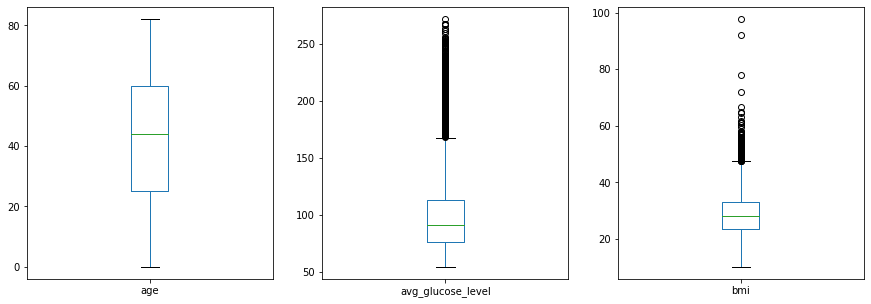

In [ ]:
df1_selected.plot(kind='box',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

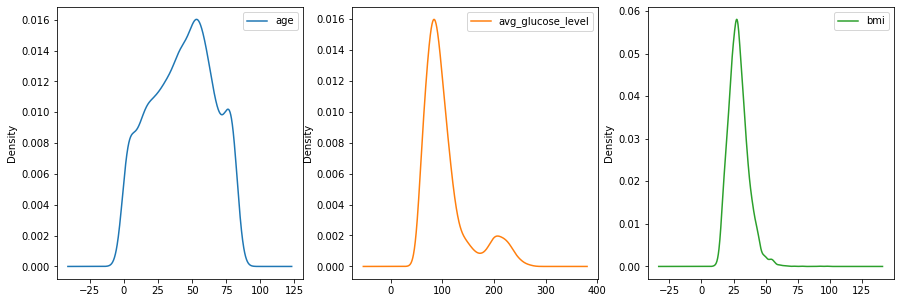

In [ ]:
df1_selected.plot(kind='density',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

#### 2.3.2 Z-Score Method

In [ ]:
df1_out=df1_selected[(np.abs(stats.zscore(df1_selected)) < 3).all(axis=1)]

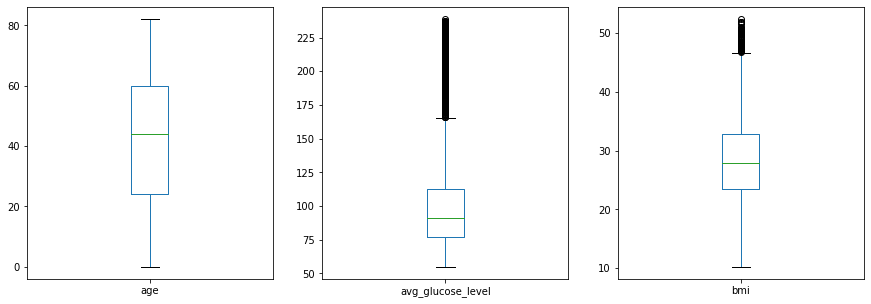

In [ ]:
df1_out.plot(kind='box',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

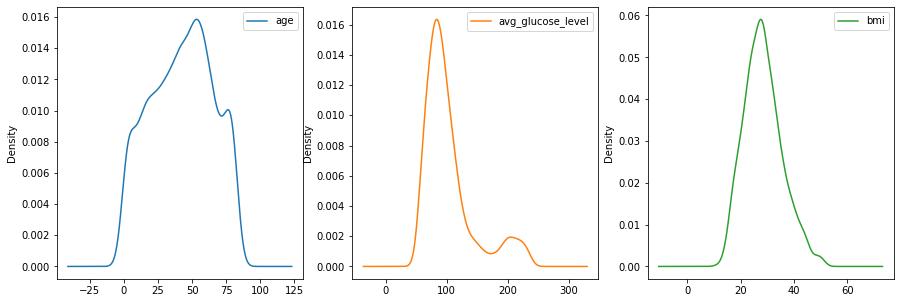

In [ ]:
df1_out.plot(kind='density',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

In [ ]:
df1_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 12 to 5109
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1938 non-null   float64
 1   avg_glucose_level  1938 non-null   float64
 2   bmi                1938 non-null   float64
dtypes: float64(3)
memory usage: 60.6 KB


In [ ]:
df1_out.describe()

,age,avg_glucose_level,bmi
count,1938.00,1938.00,1938.00
mean,43.79,91.53,28.53
std,12.44,19.26,4.04
min,21.00,60.91,21.10
25%,33.00,77.02,25.20
50%,44.00,88.47,28.40
75%,54.00,103.28,31.60
max,65.00,149.17,36.70


#### 2.3.3 IQR Method

In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = df1_selected.quantile(q=.25)
Q3 = df1_selected.quantile(q=.75)
IQR = df1_selected.apply(stats.iqr) #IQR=Q3-Q1

#keep nilai antara 1.5*IQR dari Q1 dan Q3
df1_iqr = df1_selected[~((df1_selected < (Q1-1.5*IQR)) | (df1_selected > (Q3+1.5*IQR))).any(axis=1)]

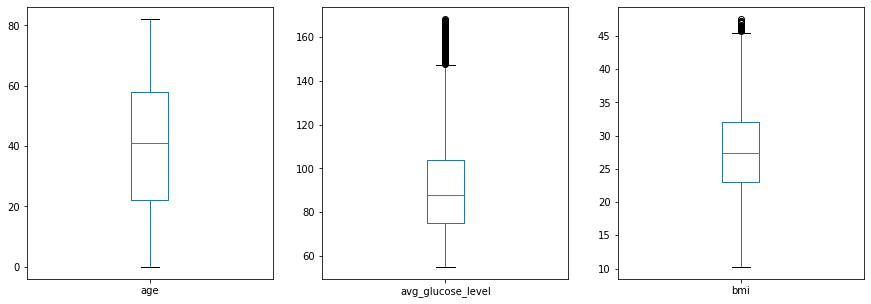

In [ ]:
df1_iqr.plot(kind='box',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

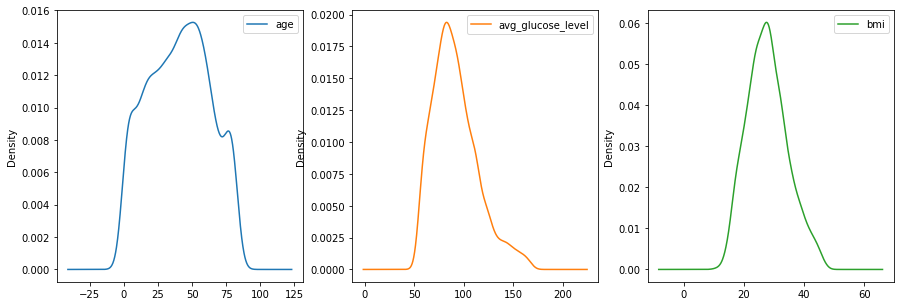

In [ ]:
df1_iqr.plot(kind='density',subplots=True,layout=(1,3),sharex=False, figsize=(15,5))
plt.show()

In [ ]:
df1_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260 entries, 2 to 5109
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                4260 non-null   float64
 1   avg_glucose_level  4260 non-null   float64
 2   bmi                4260 non-null   float64
dtypes: float64(3)
memory usage: 133.1 KB


In [ ]:
df1_iqr.describe()

,age,avg_glucose_level,bmi
count,4260.00,4260.00,4260.00
mean,40.59,91.52,27.81
std,22.44,22.72,6.72
min,0.08,55.12,10.30
25%,22.00,75.06,23.00
50%,41.00,88.06,27.40
75%,58.00,104.05,32.10
max,82.00,168.15,47.50


### 2.6 Korelasi

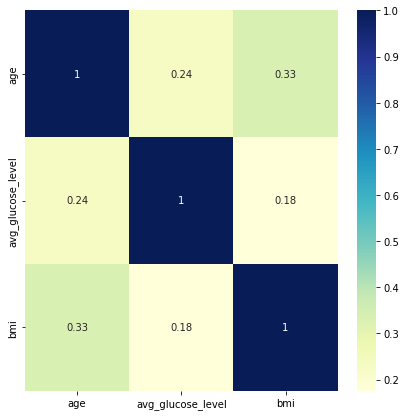

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df1_selected.corr(), annot=True,cmap="YlGnBu")

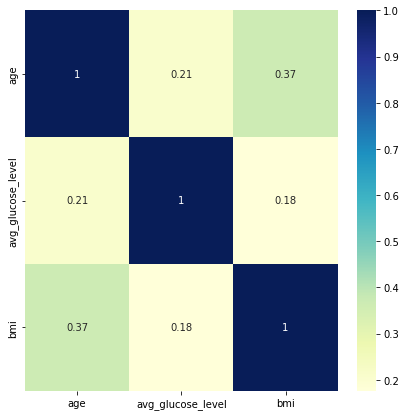

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df1_out.corr(), annot=True,cmap="YlGnBu")

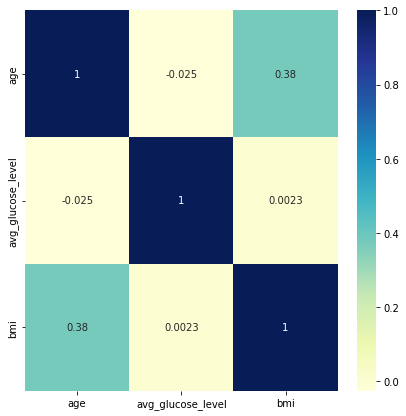

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(df1_iqr.corr(), annot=True,cmap="YlGnBu")

In [ ]:
#@title Pertanyaan 4: kenapa data vaksin covid tidak bisa dibuat korelasi?
jawab_4 = "" #@param {type:"string"}


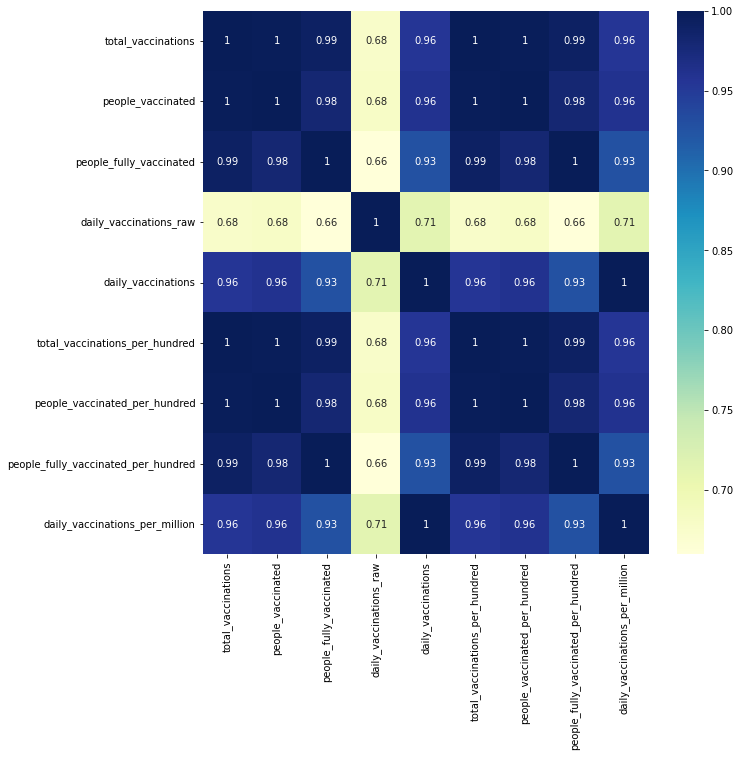

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_inter.corr(), annot=True,cmap="YlGnBu")

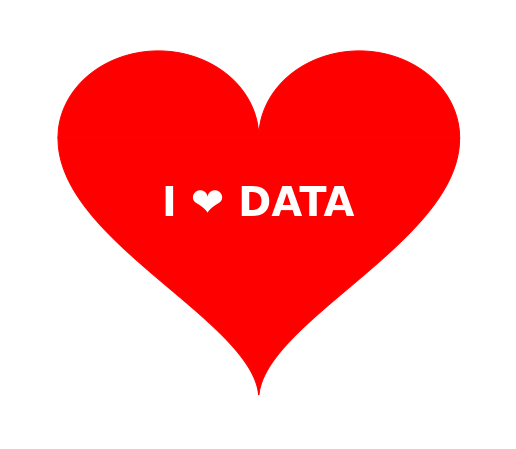

In [ ]:
#@markdown 
import matplotlib.pylab as plt
import numpy as np
plt.figure(figsize=(9, 8))
x = np.linspace(-2,2,1000)
y1 = np.sqrt(1-(abs(x)-1)**2)
y2 = -3*np.sqrt(1-(abs(x)/2)**0.5)
plt.fill_between(x, y1, color='red')
plt.fill_between(x, y2, color='red')
plt.xlim([-2.5, 2.5])
plt.ylim([-3.5, 1.5])
plt.text(0, -0.9, 'I ❤ DATA', fontsize=40, fontweight='bold',
           color='white', horizontalalignment='center')
plt.axis('off')
plt.show()